In [123]:
# import dependencies
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [124]:
# bringing in the dataset
groc_rest_data_path = "Resources/StoresRestaurantData.csv"

groc_rest_df = pd.read_csv(groc_rest_data_path)

# cleaning grocery store df
del groc_rest_df['Unnamed: 0']

In [125]:
groc_rest_df

,State,County,GroceryStores,SupercentersClubStores,ConvenienceStores,SpecializedFoodStores,FastFoodRestaurants,FullServiceRestaurants
0,AL,Autauga,6,1,29,2,30,34
1,AL,Baldwin,24,6,119,21,112,202
2,AL,Barbour,5,0,14,2,21,12
3,AL,Bibb,6,1,19,0,7,6
4,AL,Blount,6,1,31,2,24,19
...,...,...,...,...,...,...,...,...
3138,WY,Sweetwater,5,1,28,2,27,31
3139,WY,Teton,6,0,12,4,25,55
3140,WY,Uinta,3,1,15,3,15,23
3141,WY,Washakie,3,0,5,0,8,14


In [126]:
mo_df = groc_rest_df[groc_rest_df["State"] == "MO"]
counties_df = mo_df[(mo_df["County"] == "St. Louis City") \
                    | (mo_df["County"] == "St. Louis County") \
                    | (mo_df["County"] == "St. Charles") \
                    | (mo_df["County"] == "Jefferson") \
                    | (mo_df["County"] == "Platte") \
                    | (mo_df["County"] == "Jackson") \
                    | (mo_df["County"] == "Clay") \
                    | (mo_df["County"] == "Cass")]
counties_df

,State,County,GroceryStores,SupercentersClubStores,ConvenienceStores,SpecializedFoodStores,FastFoodRestaurants,FullServiceRestaurants
1501,MO,Cass,13,2,42,4,51,60
1506,MO,Clay,32,4,55,11,155,142
1530,MO,Jackson,98,11,235,42,502,457
1532,MO,Jefferson,26,2,88,7,118,95
1565,MO,Platte,12,1,21,6,66,71
1574,MO,St. Charles,40,4,103,25,250,252
1578,MO,St. Louis County,182,8,334,77,815,718
1597,MO,St. Louis City,115,0,125,27,296,345


In [127]:
counties_df["TotalSupermarket"] = counties_df[["GroceryStores", "SupercentersClubStores", "SpecializedFoodStores"]].sum(axis=1)
counties_df

c:\users\mary\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,State,County,GroceryStores,SupercentersClubStores,ConvenienceStores,SpecializedFoodStores,FastFoodRestaurants,FullServiceRestaurants,TotalSupermarket
1501,MO,Cass,13,2,42,4,51,60,19
1506,MO,Clay,32,4,55,11,155,142,47
1530,MO,Jackson,98,11,235,42,502,457,151
1532,MO,Jefferson,26,2,88,7,118,95,35
1565,MO,Platte,12,1,21,6,66,71,19
1574,MO,St. Charles,40,4,103,25,250,252,69
1578,MO,St. Louis County,182,8,334,77,815,718,267
1597,MO,St. Louis City,115,0,125,27,296,345,142


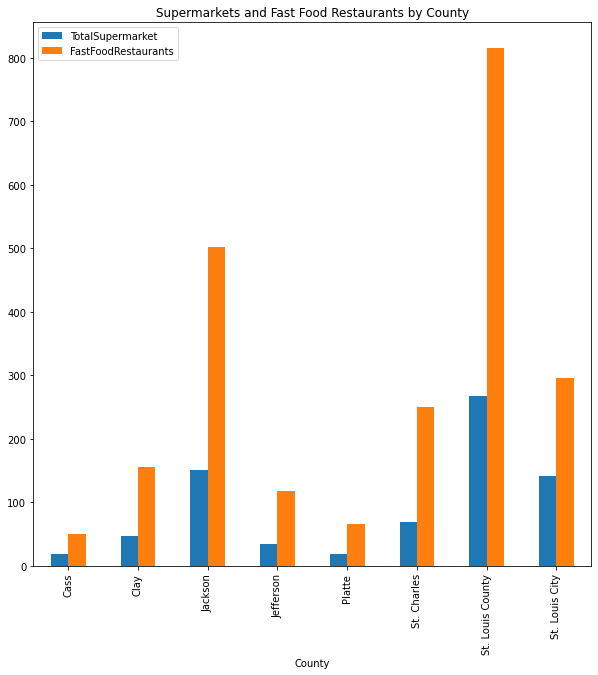

In [128]:
bar_df = counties_df[["County","TotalSupermarket","FastFoodRestaurants"]]
bar_df = bar_df.set_index("County")

ax = bar_df.plot(kind="bar", rot="vertical", figsize=(10,10))
plt.title("Supermarkets and Fast Food Restaurants by County")
plt.savefig("output_data/GrocFFbyCounty.png")

plt.show()

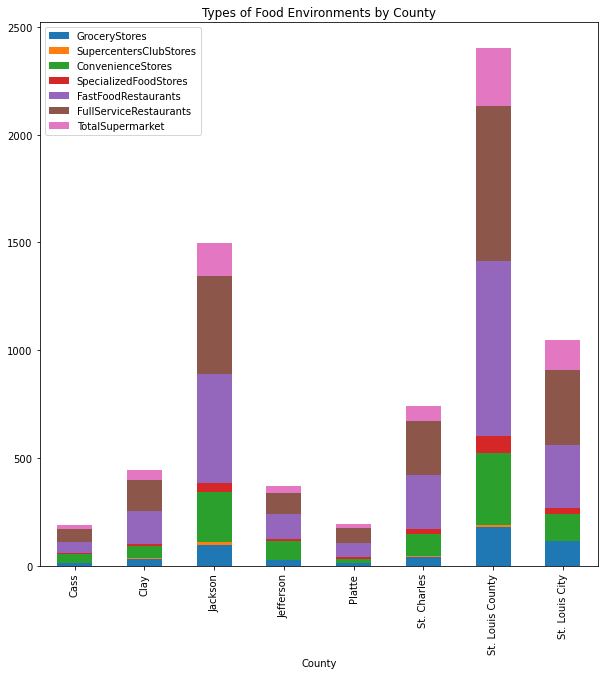

In [129]:
index_counties_df = counties_df.set_index("County")

ax = index_counties_df.plot.bar(stacked=True, rot="vertical", figsize=(10,10))
plt.title("Types of Food Environments by County")
plt.savefig("output_data/FoodEnvironmentbyCounty.png")

plt.show()